In [1]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data2=pd.read_csv('EE627A_HW3_DataSet1.csv')
data2.tail()

,5.5986,5.5986.1,5.534,5.534.1,289.37,289.82,289.3,289.66,289.37.1,289.82.1,...,21.206,41.042,42.338,41.042.1,42.108,2.133,2.1744,2.1175,2.1175.1,1
3994,4.3152,4.3203,4.3152,4.3177,290.45,290.55,290.25,290.45,290.45,290.55,...,22.289,43.479,43.479,43.479,43.479,3.0343,3.0343,3.0343,3.0343,0
3995,4.3126,4.3152,4.3074,4.3100,290.36,290.51,290.18,290.31,290.36,290.51,...,22.319,43.479,43.479,43.479,43.479,3.0343,3.0343,3.0343,3.0343,0
3996,4.3100,4.3152,4.3022,4.3048,290.41,290.41,290.12,290.15,290.41,290.41,...,22.350,43.479,43.554,43.479,43.479,3.0343,3.0343,3.0291,3.0291,0
3997,4.3048,4.3048,4.2790,4.2842,290.18,290.41,290.18,290.27,290.18,290.41,...,22.340,43.479,43.632,43.479,43.632,3.0291,3.0291,3.0240,3.0291,1
3998,4.2764,4.2790,4.2661,4.2764,290.40,290.49,290.29,290.41,290.40,290.49,...,22.350,43.707,43.784,43.632,43.632,3.0343,3.0343,3.0343,3.0343,0


In [3]:
Logistic_Regression=LogisticRegression(solver='liblinear',C=1.0, random_state=0)
fitting_model=Logistic_Regression.fit(data2.iloc[:,0:-1],data2.iloc[:,-1])

In [4]:
prob_y_pred=fitting_model.predict_proba(data2.iloc[:,0:-1])[:,1]
prob_y_pred

array([0.90747162, 0.63848316, 0.72817029, ..., 0.33351651, 0.47585259,
       0.65740467])

In [13]:
FalsePositiveRate,TruePositiveRate,_= metrics.roc_curve(data2.iloc[:,-1],prob_y_pred)
AUC=metrics.roc_auc_score(data2.iloc[:,-1],prob_y_pred,multi_class='ovr',labels=None)

<function matplotlib.pyplot.show(close=None, block=None)>

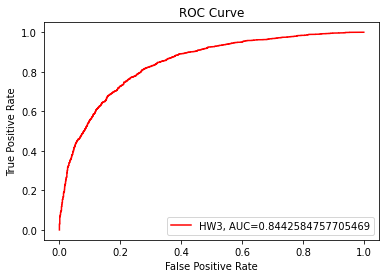

In [14]:
plt.plot(FalsePositiveRate,TruePositiveRate,label='HW3, AUC='+str(AUC),color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show

In [15]:
x_train, x_test, y_train, y_test=train_test_split(data2.iloc[:,0:-1], data2.iloc[:,-1], test_size=0.25,random_state=0,shuffle=False)
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(2999, 476)
(1000, 476)
(2999,)
(1000,)


In [16]:
Logistic_Regression2=LogisticRegression(solver='liblinear',C=10.0, random_state=0)
fitting_model2=Logistic_Regression.fit(x_train,y_train)

In [17]:
prob_y_pred2=fitting_model.predict_proba(x_train.iloc[:,0:])[:,1]
prob_y_pred2

array([0.99213739, 0.85113728, 0.81946553, ..., 0.89633146, 0.85157403,
       0.74315305])

In [18]:
FP_Rate,TP_Rate,_ = metrics.roc_curve(x_train.iloc[:,0:],prob_y_pred2)
AUC_Train=metrics.roc_auc_score(x_train.iloc[:,0:],prob_y_pred2,multi_class='ovr',labels=None)

ValueError: continuous-multioutput format is not supported